Let us load the data, create dataframe and observe it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
raw_train = pd.read_csv('d:\\testing\\House Prices\\train.csv')
raw_test = pd.read_csv('d:\\testing\\House Prices\\test.csv')

In [3]:
raw_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
X = raw_train.drop(['Id', 'SalePrice'], axis = 1)
y = raw_train['SalePrice'] #SalePrice is our target
test = raw_test.drop(['Id'], axis=1)

Searching for numerical features, ascribing and scaling

In [6]:
numerical_features = X.select_dtypes(include = ['int16','int32', 
                                                'int64', 'float16', 
                                                'float32', 'float64']
                                    ).columns.values

In [7]:
categorical_features = X.select_dtypes(exclude = ['int16','int32', 
                                                'int64', 'float16', 
                                                'float32', 'float64']
                                      ).columns.values

In [8]:
categorical_features

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [9]:
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X[numerical_features])

SimpleImputer(strategy='median')

In [10]:
X[numerical_features] = imputer.transform(X[numerical_features])
test[numerical_features] = imputer.transform(test[numerical_features])

In [11]:
scaler = StandardScaler()
scaler.fit(X[numerical_features])

StandardScaler()

In [12]:
X[numerical_features] = scaler.transform(X[numerical_features])
test[numerical_features]=scaler.transform(test[numerical_features])

In [13]:
X = X.drop(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], axis=1)

In [14]:
test = test.drop(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], axis=1)

In [15]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [16]:
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.872563,0.460320,0.110763,-0.795151,0.381743,-0.340077,-1.156380,-0.570750,0.053428,0.604293,...,1.202536,0.365179,-0.704483,-0.359325,-0.116339,1.882709,-0.068692,-0.087688,-0.119110,1.64521
1,-0.872563,0.505733,0.375850,-0.071836,0.381743,-0.439440,-1.301740,0.027027,1.051363,-0.288653,...,-0.753188,2.384400,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,25.116309,-0.119110,1.64521
2,0.073375,0.187842,0.332053,-0.795151,-0.517200,0.852269,0.636400,-0.570750,0.761852,-0.288653,...,0.042202,0.939819,-0.191147,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.229111,1.64521
3,0.073375,0.369494,-0.054002,-0.071836,0.381743,0.885390,0.636400,-0.460051,0.347326,-0.288653,...,-0.013943,2.121024,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,1.64521
4,1.492282,-1.219961,-0.552407,1.374795,-0.517200,0.686666,0.345679,-0.570750,-0.396190,-0.288653,...,0.154492,-0.752176,0.533564,-0.359325,-0.116339,2.313293,-0.068692,-0.087688,-1.969111,1.64521


Data split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        test_size=0.3, random_state=1)

Linear Regression

In [18]:
linear_m = linear_model.LinearRegression()
linear_m.fit(X_train, y_train)

LinearRegression()

In [19]:
linear_predictions_test = linear_m.predict(X_test)
mean_squared_error(linear_predictions_test, y_test, squared = False)

34947.242428863334

Linear Regression with Lasso

In [20]:
linear_with_lasso = linear_model.Lasso(alpha=0.1)
linear_with_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [21]:
lasso_predictions = linear_with_lasso.predict(X_test)
mean_squared_error(lasso_predictions, y_test, squared = False)

34952.05090459071

In [22]:
# lasso does not improve the result

Random Forest

In [23]:
# at first we try searching for the best pool of parameters

In [24]:
tuned_parameters = {'n_estimators': [100, 300, 500, 700, 1000],
                    'max_depth': [2, 4, 6, 8, 10],
                    'max_features': [5, 10, 15, 20, 25]
                   }

In [25]:
clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, n_jobs=-1, verbose=1)

In [26]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [5, 10, 15, 20, 25],
                         'n_estimators': [100, 300, 500, 700, 1000]},
             verbose=1)

In [27]:
print(clf.best_estimator_)

RandomForestRegressor(max_depth=10, max_features=10, n_estimators=300)


In [28]:
rf = RandomForestRegressor(n_estimators=300, max_depth=10,
                           max_features=10, random_state=1)

In [29]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=10, n_estimators=300,
                      random_state=1)

In [30]:
rf_test_predictions = rf.predict(X_test)
mean_squared_error(rf_test_predictions, y_test, squared = False)

27318.040976783264

Some visualisation of predictions on test data

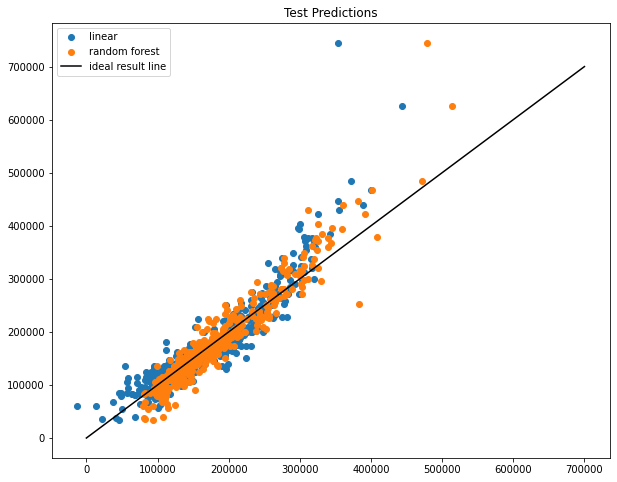

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(linear_predictions_test, y_test, label='linear')
plt.scatter(rf_test_predictions, y_test, label='random forest')
plt.plot([0, 700000], [0, 700000], color='black',
        label='ideal result line') 
plt.title('Test Predictions')
plt.legend(loc='upper left')
plt.show()

Random Forest showed best results on test data,
but it clearly needs further improving by concerning 
categorical features via one hot encoding.

In [32]:
# submitting

predictions = rf.predict(test)

sub = pd.DataFrame({'Id':raw_test['Id'],
                    'SalePrice':predictions}
                  )

In [33]:
sub.to_csv('d:\\testing\\House Prices\\sub.csv', index = False)